In [1]:
import torch
from torchsummary import summary
import random
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


In [3]:
MyNet = nn.Sequential(
    nn.Linear(1, 50),
    nn.ReLU(),
    nn.Linear(50, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
)
MyNet.to(device)
summary(MyNet, input_size=(32, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 32, 50]             100
              ReLU-2               [-1, 32, 50]               0
            Linear-3              [-1, 32, 100]           5,100
              ReLU-4              [-1, 32, 100]               0
            Linear-5               [-1, 32, 50]           5,050
              ReLU-6               [-1, 32, 50]               0
            Linear-7                [-1, 32, 1]              51
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.04
Estimated Total Size (MB): 0.14
----------------------------------------------------------------


In [4]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

# 40 data, with normalized x and y

In [5]:
lstX1 = []
lstY1 = []
for x in range(-5000, 5000, 250):
  lstX1.append(x)
  y = 3*x*x*x + 2*x*x + 5*x + random.uniform(0,1)*5000
  lstY1.append(y)

#normalize x to [-1, 1]
lstX = []
for x in lstX1:
  x = x/5000.0
  lstX.append([x])

#normalize y to [-1, 1]
maxY = max(lstY1)
minY = min(lstY1)
r = maxY - minY
lstY = []
for y in lstY1:
  y = y/r  #normalized to [-1, 1]
  lstY.append([y])

In [6]:
numpyX = np.array(lstX)
numpyY = np.array(lstY)
trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
tensorX = torch.FloatTensor(trainX).to(device)
tensorY_hat = torch.FloatTensor(trainY_hat).to(device)
print(tensorX.shape, tensorY_hat.shape)

torch.Size([32, 1]) torch.Size([32, 1])


# Train with all data

Training loss: 0.00


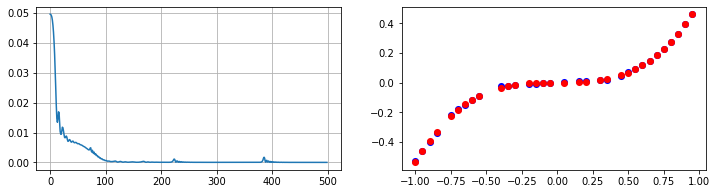

In [7]:
# initialize NN weights
for name, param in MyNet.named_parameters():
  if(param.requires_grad):
    torch.nn.init.normal_(param, mean=0.0, std=0.02)

lossLst = []
for epoch in range(1, 500):
  tensorY = MyNet(tensorX)
  loss = loss_func(tensorY_hat, tensorY)
  lossLst.append(float(loss))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
fig=plt.figure(figsize=(12, 3))
fig.add_subplot(1, 2, 1) 
plt.plot(lossLst)
plt.grid()

## take a look at training data performance
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("Training loss: %.2f" % (float(loss)))
fig.add_subplot(1, 2, 2) 
trainY = tensorY.detach().cpu().numpy()
plt.scatter(trainX, trainY, s=50, lw=0, color="blue")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="red")
plt.show()

# Define a data loader to load data in batches

In [8]:
import torch.utils.data as Data
torch_dataset = Data.TensorDataset(tensorX, tensorY_hat)

In [9]:
loader = Data.DataLoader(
    dataset=torch_dataset,  
    batch_size=15,      
    shuffle=True,       
    num_workers=0,    # subprocesses for loading data
)

In [10]:
for (batchX, batchY_hat) in loader:
  print(batchX.shape,", ", batchY_hat.shape)

torch.Size([15, 1]) ,  torch.Size([15, 1])
torch.Size([15, 1]) ,  torch.Size([15, 1])
torch.Size([2, 1]) ,  torch.Size([2, 1])


In [11]:
for (batchX, batchY_hat) in loader:
  break
print(batchX.shape,", ", batchY_hat.shape)

torch.Size([15, 1]) ,  torch.Size([15, 1])


In [12]:
tensorY = MyNet(batchX)

In [13]:
loss = loss_func(batchY_hat, tensorY)

# Train with mini-batch

Training loss: 0.00


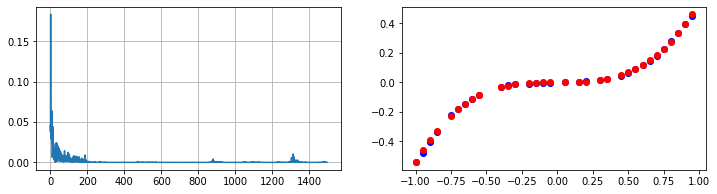

In [14]:
# initialize NN weights
for name, param in MyNet.named_parameters():
  if(param.requires_grad):
    torch.nn.init.normal_(param, mean=0.0, std=0.02)

lossLst = []
for epoch in range(1, 500):
  for (batchX, batchY_hat) in loader:
    tensorY = MyNet(batchX)
    loss = loss_func(batchY_hat, tensorY)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
fig=plt.figure(figsize=(12, 3))
fig.add_subplot(1, 2, 1) 
plt.plot(lossLst)
plt.grid()

## take a look at training data performance
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("Training loss: %.2f" % (float(loss)))
fig.add_subplot(1, 2, 2) 
trainY = tensorY.detach().cpu().numpy()
plt.scatter(trainX, trainY, s=50, lw=0, color="blue")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="red")
plt.show()

# Experiment with different mini-batch size

In [16]:
loader = Data.DataLoader(
    dataset=torch_dataset,  
    batch_size=10,      
    shuffle=True,       
    num_workers=0,    # subprocesses for loading data
)

Training loss: 0.00


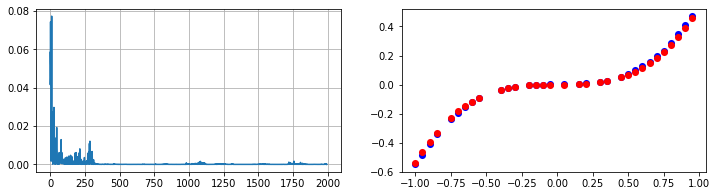

In [17]:
# initialize NN weights
for name, param in MyNet.named_parameters():
  if(param.requires_grad):
    torch.nn.init.normal_(param, mean=0.0, std=0.02)

lossLst = []
for epoch in range(1, 500):
  for (batchX, batchY_hat) in loader:
    tensorY = MyNet(batchX)
    loss = loss_func(batchY_hat, tensorY)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
fig=plt.figure(figsize=(12, 3))
fig.add_subplot(1, 2, 1) 
plt.plot(lossLst)
plt.grid()

## take a look at training data performance
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("Training loss: %.2f" % (float(loss)))
fig.add_subplot(1, 2, 2) 
trainY = tensorY.detach().cpu().numpy()
plt.scatter(trainX, trainY, s=50, lw=0, color="blue")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="red")
plt.show()

In [18]:
loader = Data.DataLoader(
    dataset=torch_dataset,  
    batch_size=5,      
    shuffle=True,       
    num_workers=0,    # subprocesses for loading data
)

Training loss: 0.00


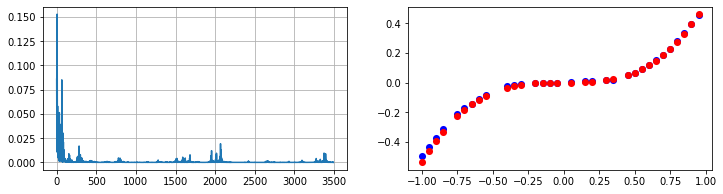

In [19]:
# initialize NN weights
for name, param in MyNet.named_parameters():
  if(param.requires_grad):
    torch.nn.init.normal_(param, mean=0.0, std=0.02)

lossLst = []
for epoch in range(1, 500):
  for (batchX, batchY_hat) in loader:
    tensorY = MyNet(batchX)
    loss = loss_func(batchY_hat, tensorY)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
fig=plt.figure(figsize=(12, 3))
fig.add_subplot(1, 2, 1) 
plt.plot(lossLst)
plt.grid()

## take a look at training data performance
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("Training loss: %.2f" % (float(loss)))
fig.add_subplot(1, 2, 2) 
trainY = tensorY.detach().cpu().numpy()
plt.scatter(trainX, trainY, s=50, lw=0, color="blue")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="red")
plt.show()